<center><h1> Capstone Project <h1></center>

![](./house.jpg)
    
[Dataset](https://datasource.kapsarc.org/explore/dataset/building-permits-issued-by-municipalities-by-regions-and-type-of-permit-1987-201/information/?disjunctive.region&disjunctive.building_type&disjunctive.indicator&sort=-time_period&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiU1VNIiwieUF4aXMiOiJpbmRpY2F0b3JfdmFsdWUiLCJjb2xvciI6InJhbmdlLUFjY2VudCIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJwb3NpdGlvbiI6ImNlbnRlciJ9XSwieEF4aXMiOiJ0aW1lX3BlcmlvZCIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6InllYXIiLCJzb3J0IjoiIiwic2VyaWVzQnJlYWtkb3duIjoiaW5kaWNhdG9yX3ZhbHVlIiwiY29uZmlnIjp7ImRhdGFzZXQiOiJidWlsZGluZy1wZXJtaXRzLWlzc3VlZC1ieS1tdW5pY2lwYWxpdGllcy1ieS1yZWdpb25zLWFuZC10eXBlLW9mLXBlcm1pdC0xOTg3LTIwMSIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUucmVnaW9uIjp0cnVlLCJkaXNqdW5jdGl2ZS5idWlsZGluZ190eXBlIjp0cnVlLCJkaXNqdW5jdGl2ZS5pbmRpY2F0b3IiOnRydWUsInNvcnQiOiItdGltZV9wZXJpb2QifX0sInNlcmllc0JyZWFrZG93blRpbWVzY2FsZSI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D)

## 1. LOADING DATA 

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_object_dtype

# Load in the Data
df = pd.read_excel('./Real Estate Full.xlsx')
df.head()
#df.shape

Year    Region                              Building Type      lng  \
0  1987  Al-Baaha  Educational Buildings, Health and Mosques  20.0129   
1  1987  Al-Baaha                     Industrial, Commercial  20.0129   
2  1987  Al-Baaha                    Residential, Commercial  20.0129   
3  1987  Al-Baaha          Social Buildings and Governmental  20.0129   
4  1987  Al-Baaha                                      Total  20.0129   

       lat  Total Lenghts of Fences (L.M.) (ooo)  Number of Permits  \
0  41.4677                                2400.0                6.0   
1  41.4677                                5828.0               52.0   
2  41.4677                               70970.0              540.0   
3  41.4677                                   NaN                NaN   
4  41.4677                               79198.0              598.0   

   Total Floor Area (S.M.) (ooo)  Total Area of Plot (S.M.)  \
0                         6574.0                     8629.0   
1                        20340.0                   124652.0   
2                       279442.0                   949231.0   
3                            NaN                        NaN   
4                       306356.0                  1082512.0   

   Total Number of Floors  Total Area of Building (S.M.)  
0                    57.0                         4574.0  
1                    54.0                        17713.0  
2                   759.0                       161022.0  
3                     NaN                            NaN  
4                   870.0                       183309.0

## 2. SUMMARY OF DATA
- Total Samples
- Total Features
- Total Categorical Features
- Total Numerical Features
- Stats of Numerical Features
- Value Count of Categorical Features
- Unique Values DataFrame
- Null Values DataFrame

In [2]:
#-------------------------------------------------------------------
#function that return the Numerical Features and Categorical Features
def get_cat_num_features(df):
    
    num_features = []
    cat_features = []
    
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            num_features.append(col)
                
        if is_object_dtype(df[col]):
            cat_features.append(col)
            
    return num_features, cat_features

#-------------------------------------------------------------------
#function that return tne count of unique value in each feature
def get_unique_df(features):
    unique_df = pd.DataFrame(columns=['Feature', 'Unique', 'Count'])
    for col in features.columns:
        v = features[col].unique()
        l = len(v)
        unique_df = unique_df.append({'Feature':col, 
                                     'Unique':v,
                                     'Count':l}, ignore_index=True)
    return unique_df

#-------------------------------------------------------------------
#funcation that calculat only the count of null value 
#withe name of feature and the type and he percentage of null value
def get_null_df(features):
    col_null_df = pd.DataFrame(columns = ['Column', 'Type', 'Total NaN', '%'])
    col_null = features.columns[features.isna().any()].to_list()
    L = len(features)
    for col in col_null:
        T = 0
        if is_numeric_dtype(features[col]):
            T = "Numerical"  
        else:
            T = "Categorical"
        nulls = len(features[features[col].isna() == True][col])   
        col_null_df = col_null_df.append({'Column': col, 
                                          'Type': T,
                                          'Total NaN': nulls,
                                          '%': (nulls / L)*100
                                         }, ignore_index=True)
        
    return col_null_df

#-------------------------------------------------------------------
#function that save the summary n dataframe and print the summary of tha data that incloud :
#the number of samples 
#number of Features and the type of it 
#the count of unique value in feature
#the count of null value 
def summary(data):
    
    print("Samples --> ", len(data))
    print()
    target = data['Number of Permits']
    features = data.drop(['Number of Permits'], axis=1)
    print("Features --> ", len(features.columns))
    print("\n",features.columns)
    
    num_features, cat_features = get_cat_num_features(features)
      
    print()
    print("\nNumerical Features --> ", len(num_features))
    print()
    print(num_features)
    print()
    print("Categorical Features -->", len(cat_features))
    print()
    print(cat_features)
    print()
    print("*************************************************")
    stats = features.describe().T
    
    print()
    print("Value counts of each categorical feature\n")
    for col in cat_features:
        print(col)
        print(features[col].value_counts())
        print()
        
    unique_df = get_unique_df(features)
    
    col_null_df = get_null_df(features)
    
    return {'features':features, 
            'target': target, 
            'stats': stats, 
            'unique_df':unique_df,
            'col_null_df': col_null_df}

In [3]:
df_summary = summary(df)

Samples -->  2394

Features -->  10

 Index(['Year', 'Region', 'Building Type', 'lng', 'lat',
       'Total Lenghts of Fences (L.M.) (ooo)', 'Total Floor Area (S.M.) (ooo)',
       'Total Area of Plot (S.M.)', 'Total Number of Floors',
       'Total Area of Building (S.M.)'],
      dtype='object')


Numerical Features -->  8

['Year', 'lng', 'lat', 'Total Lenghts of Fences (L.M.) (ooo)', 'Total Floor Area (S.M.) (ooo)', 'Total Area of Plot (S.M.)', 'Total Number of Floors', 'Total Area of Building (S.M.)']

Categorical Features --> 2

['Region', 'Building Type']

*************************************************

Value counts of each categorical feature

Region
Al-Qasim            171
Aseer               171
Jazan               171
Najran              171
Al-Baaha            171
Northern Borders    171
Al-Jowf             171
Eastern             171
Hael                171
Riyadh              171
Grand Total         171
Makkah              171
Madinah             171
Tabuk             

In [4]:
# Features with only 1 unique value
df_summary['unique_df'][df_summary['unique_df']['Count'] == 1]

Empty DataFrame
Columns: [Feature, Unique, Count]
Index: []

In [5]:
# Features with null values
df_summary['col_null_df']

Column       Type Total NaN         %
0  Total Lenghts of Fences (L.M.) (ooo)  Numerical        15  0.626566
1         Total Floor Area (S.M.) (ooo)  Numerical        15  0.626566
2             Total Area of Plot (S.M.)  Numerical        15  0.626566
3                Total Number of Floors  Numerical        15  0.626566
4         Total Area of Building (S.M.)  Numerical        15  0.626566

In [6]:
# stats of the numerical feature
df_summary['stats']

count          mean           std  \
Year                                  2394.0  2.003526e+03  9.755319e+00   
lng                                   2394.0  2.404321e+01  4.427143e+00   
lat                                   2394.0  4.252417e+01  3.257128e+00   
Total Lenghts of Fences (L.M.) (ooo)  2379.0  3.400949e+05  1.120086e+06   
Total Floor Area (S.M.) (ooo)         2379.0  3.298047e+06  1.161424e+07   
Total Area of Plot (S.M.)             2379.0  8.402478e+06  3.081786e+07   
Total Number of Floors                2379.0  8.427704e+03  3.176180e+04   
Total Area of Building (S.M.)         2379.0  1.478773e+06  4.749471e+06   

                                            min          25%           50%  \
Year                                  1987.0000    1995.0000    2004.00000   
lng                                     16.8892      20.0129      24.55835   
lat                                     36.5789      39.8664      42.13060   
Total Lenghts of Fences (L.M.) (ooo)     0.0000    5548.0000   34263.00000   
Total Floor Area (S.M.) (ooo)            0.0000   46747.5000  277831.60000   
Total Area of Plot (S.M.)                0.0000  183494.5000  926927.00000   
Total Number of Floors                   0.0000      49.0000     384.00000   
Total Area of Building (S.M.)            0.0000   30815.8900  167877.00000   

                                               75%           max  
Year                                  2.012000e+03  2.019000e+03  
lng                                   2.752360e+01  3.098330e+01  
lat                                   4.413220e+01  5.010000e+01  
Total Lenghts of Fences (L.M.) (ooo)  2.011780e+05  1.567571e+07  
Total Floor Area (S.M.) (ooo)         1.604985e+06  1.516168e+08  
Total Area of Plot (S.M.)             4.288988e+06  5.066000e+08  
Total Number of Floors                3.453500e+03  4.428500e+05  
Total Area of Building (S.M.)         8.581054e+05  5.765247e+07

In [7]:
#print the value of our target
target = df_summary['target']
target

0          6.0
1         52.0
2        540.0
3          NaN
4        598.0
         ...  
2389       0.0
2390    2563.0
2391      92.0
2392      12.0
2393    2798.0
Name: Number of Permits, Length: 2394, dtype: float64

## 3. DATA PREPROCESSING
- Rename Columns 
- Drop Duplicates
- Drop Columns with more than 90% null values
- Drop Columns with single unique values
- Handle Other Null Values
- Outlier Analysis and Removal
- Drop Columns with single unique values again after outlier analysis

### I. Rename columns

In [8]:
# rename columns 

# df = df_summary['features']

df.rename(columns={'lat':'Latitude'}, inplace = True)
df.rename(columns={'lng':'Longitude'}, inplace = True)
df.rename(columns={'Total Lenghts of Fences (L.M.) (ooo)':'Total Lenghts of Fences'}, inplace = True)
df.rename(columns={'Total Floor Area (S.M.) (ooo)':'Total Floor Area'}, inplace = True)
df.rename(columns={'Total Area of Plot (S.M.)':'Total Area of Plot'}, inplace = True)
df.rename(columns={'Total Area of Building (S.M.)':'Total Area of Building'}, inplace = True)

df.columns

Index(['Year', 'Region', 'Building Type', 'Longitude', 'Latitude',
       'Total Lenghts of Fences', 'Number of Permits', 'Total Floor Area',
       'Total Area of Plot', 'Total Number of Floors',
       'Total Area of Building'],
      dtype='object')

### II. Drop Duplicates

In [9]:
# Drop Duplicates

cleaned_df = df.drop_duplicates()
print("Total Duplicates were ", len(df) - len(cleaned_df))

Total Duplicates were  0


### III. Drop Columns with more than 90% null values

In [10]:
# Features with only 90% null values
col_null_df = df_summary['col_null_df']
col_null_df[col_null_df['%']>=90]

Empty DataFrame
Columns: [Column, Type, Total NaN, %]
Index: []

### IV. Drop columns with single unique value

In [11]:
# Features with only 1 unique value
df_summary['unique_df'][df_summary['unique_df']['Count']==1]

Empty DataFrame
Columns: [Feature, Unique, Count]
Index: []

### V. Handle Other NaN Values

In [12]:
#print the summary of null vale
col_null_df = df_summary["col_null_df"]
col_null_df

Column       Type Total NaN         %
0  Total Lenghts of Fences (L.M.) (ooo)  Numerical        15  0.626566
1         Total Floor Area (S.M.) (ooo)  Numerical        15  0.626566
2             Total Area of Plot (S.M.)  Numerical        15  0.626566
3                Total Number of Floors  Numerical        15  0.626566
4         Total Area of Building (S.M.)  Numerical        15  0.626566

- since the null values are less than 10% we will drop them 

In [13]:
# drop all of the missing values 
cleaned_df = cleaned_df.dropna()

In [14]:
# Check if there is a null value
cleaned_df.columns[cleaned_df.isna().any()]

Index([], dtype='object')

### VI. Drop the record of Total (sum of records)

In [15]:
#drop rows that contain specific 'value' in 'column_name'
cleaned_df = cleaned_df[cleaned_df.Region != 'Grand Total']

In [16]:
#drop rows that contain specific 'value' in 'column_name'
cleaned_df = cleaned_df[cleaned_df['Building Type'] != 'Total']

### VII. Outlier Analysis and Removal
- Using QI 

In [17]:
#print the shape of our data 
cleaned_df.shape

(1779, 11)

In [18]:
#### 
# First quartile (Q1)
Q1 = np.percentile(cleaned_df['Total Area of Plot'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(cleaned_df['Total Area of Plot'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

# lower bound outliers --> Q1 - 1.5(IQR)
# higher bound outliers --> Q3 + 1.5 (IQR)


print(round(Q3+ 1.5*(IQR),4))

4473235.275


In [19]:
# Dropping the outliers from Total bill column
cleaned_df=cleaned_df.drop(cleaned_df[cleaned_df['Total Area of Plot'] > 10445691.25 ].index)

In [20]:
cleaned_df.shape

(1666, 11)

### VIII. Drop Columns with single unique values again after outlier analysis

In [21]:
# Features with only 1 unique value
#df_summary['unique_df'][df_summary['unique_df']['Count']==1]

### IX. Define Target and Features 

In [22]:
# Define Target and Features 

target = cleaned_df['Number of Permits']
features = cleaned_df.drop(['Number of Permits'], axis=1)

## 4. EDA
- Scatterplot and distribution of numerical features
- BarCharts of categorical features
- Box plots to check the outliers

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [24]:
# center the images
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### I. Scatterplot and distribution of numerical features

In [25]:
#return the type of feature in two varabel
#num_feat contain Numerical features
#cat_feat contain categorical features
num_feat, cat_feat = get_cat_num_features(cleaned_df)

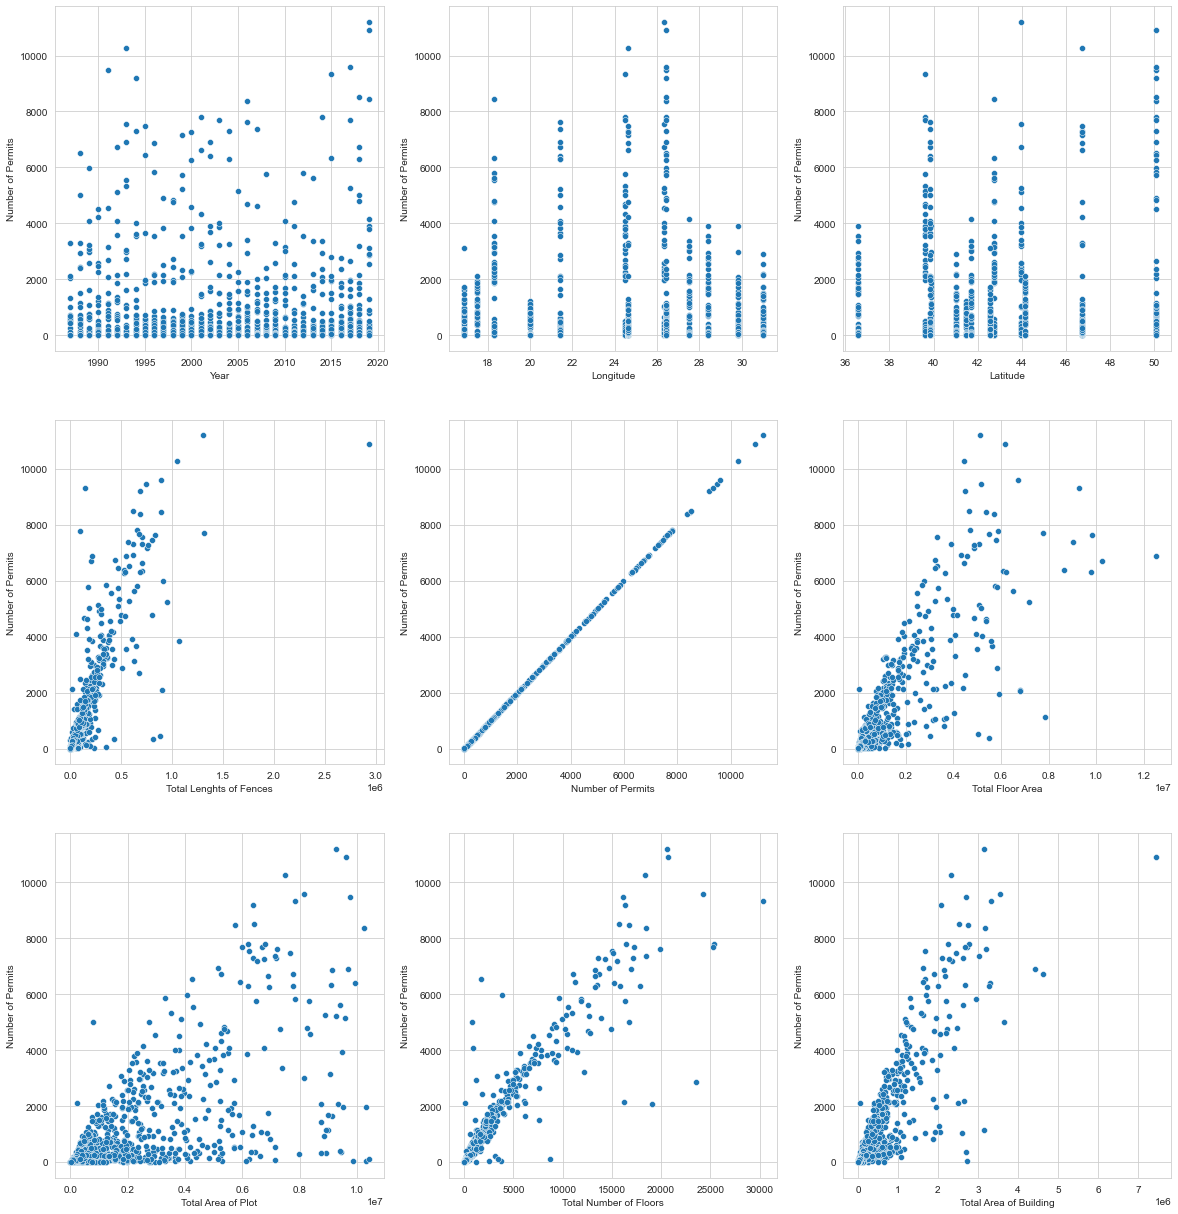

In [26]:
#  Scatterplot for numerical features

plt.figure(figsize=(20,90))
for i in range(len(num_feat)):
    plt.subplot(12, 3, i+1)
    sns.scatterplot(x=cleaned_df[num_feat[i]], y=target)

plt.show()

### II. Bar Plot for Categorical Features

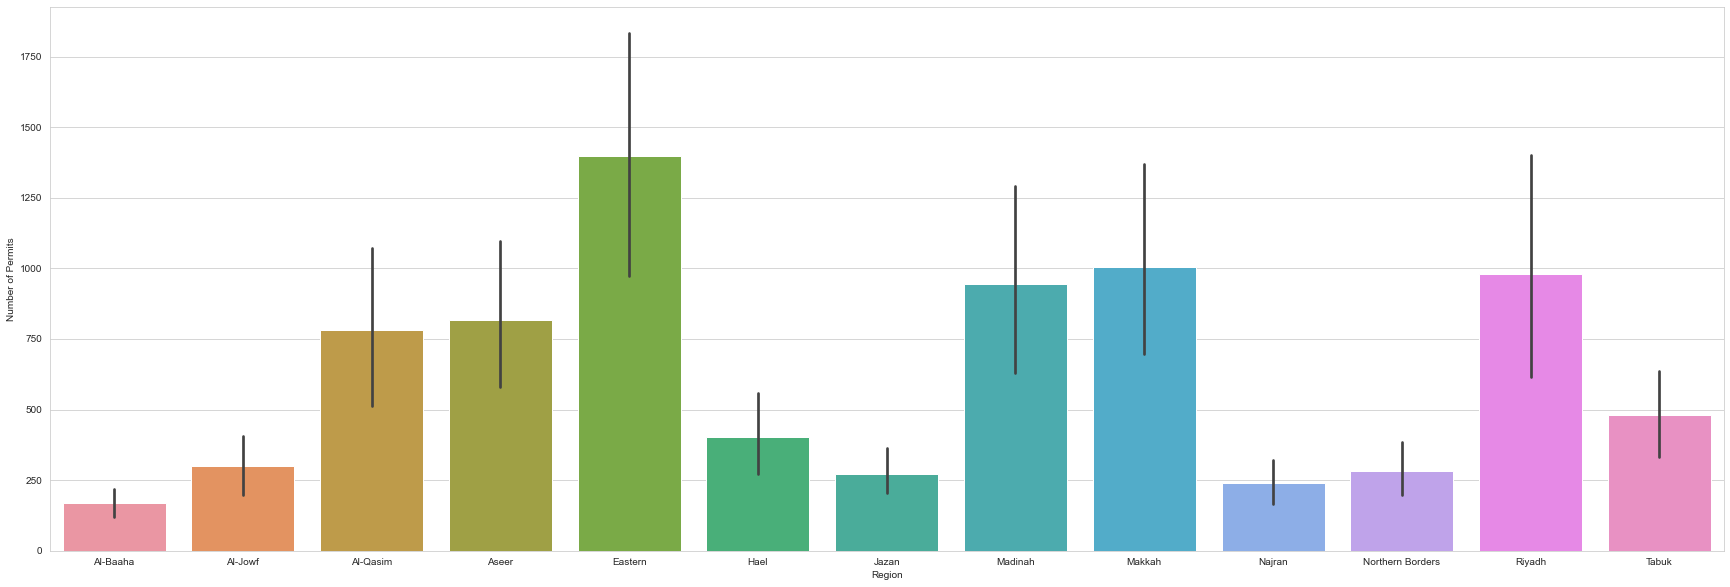

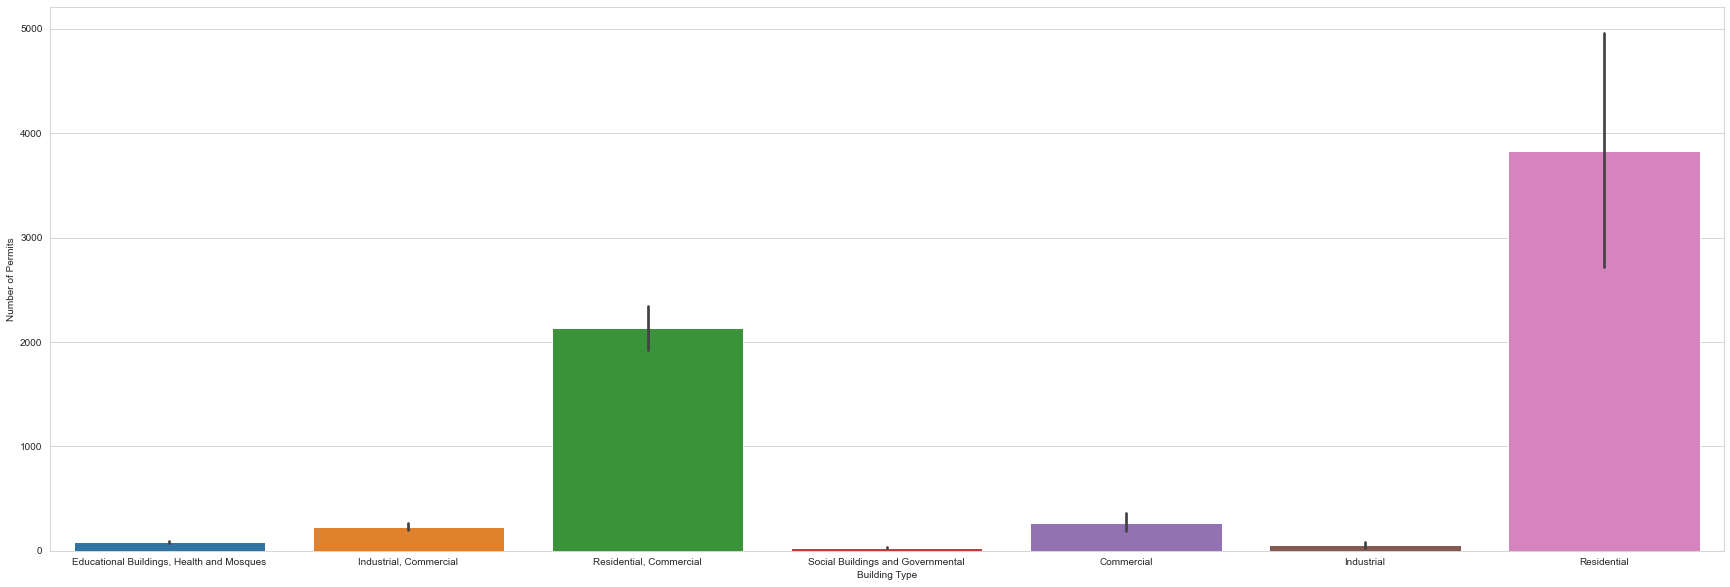

In [27]:
#  Bar Plot for Categorical Features
for col in cat_feat:
    plt.figure(figsize=(30, 10))
    sns.barplot(x=cleaned_df[col], y=target)
    plt.show()

### III. Box Plot of Numerical Features

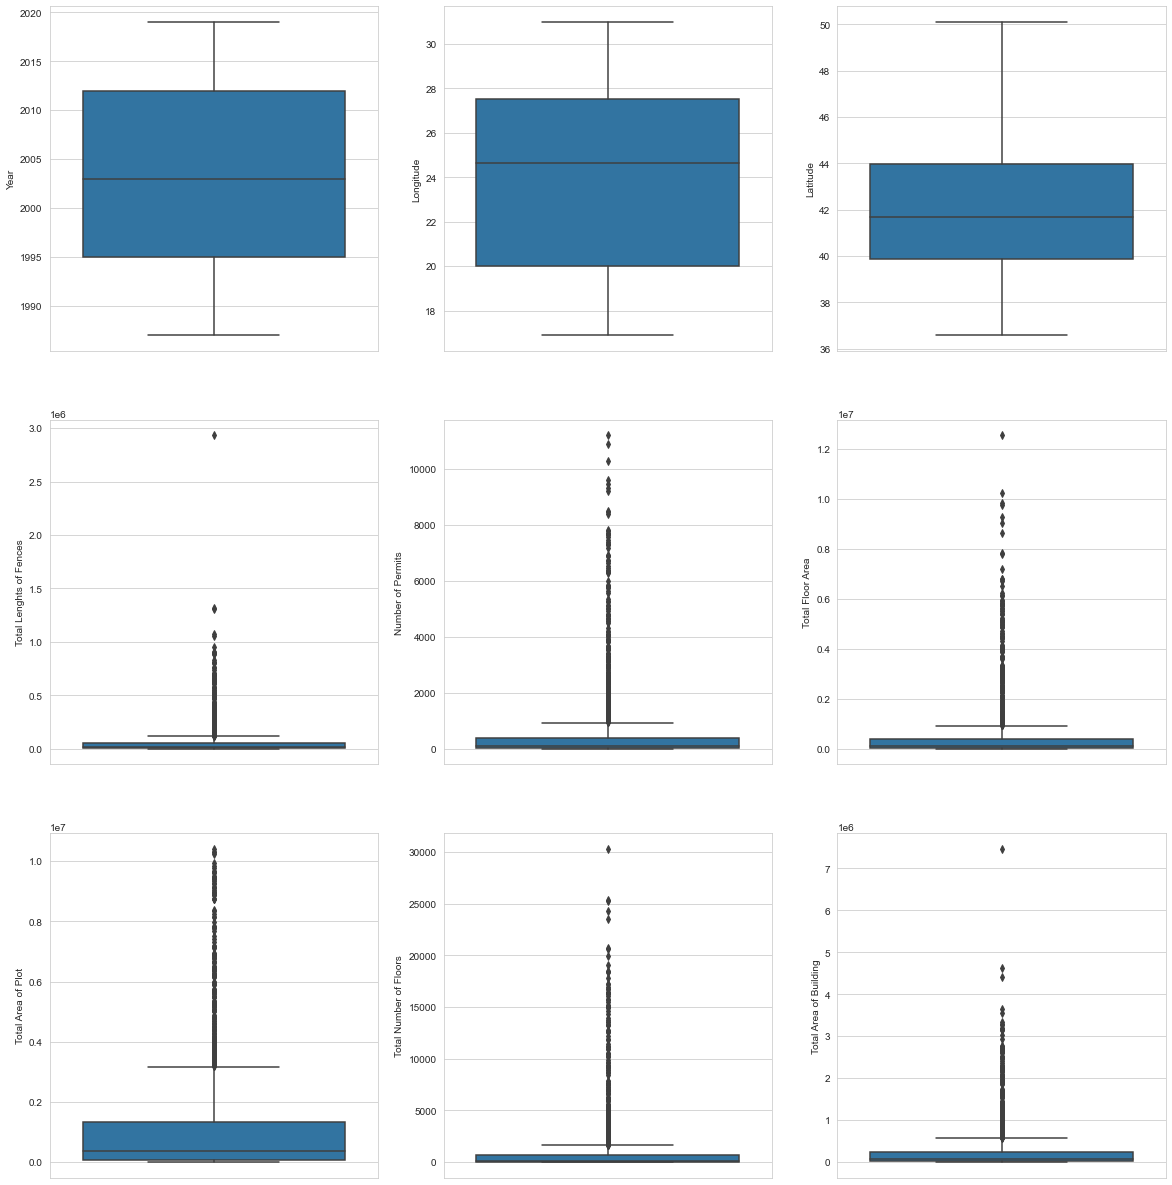

In [28]:
# Box Plot of Numerical Features

plt.figure(figsize=(20,90))
for i in range(len(num_feat)):
    plt.subplot(12, 3, i+1)
    sns.boxplot(y=cleaned_df[num_feat[i]])

plt.show()

### IV. Distribution Plots

<Figure size 1440x6480 with 0 Axes>

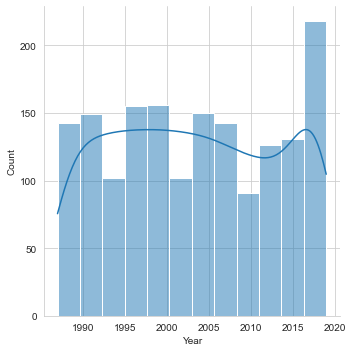

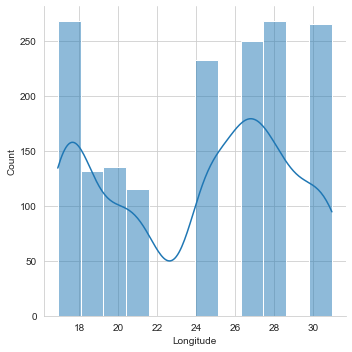

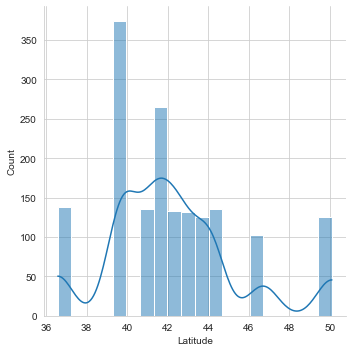

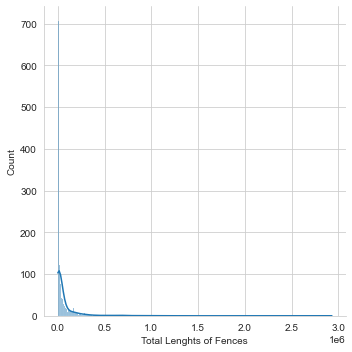

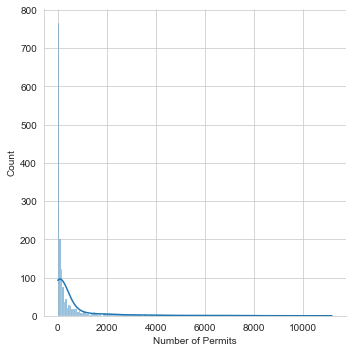

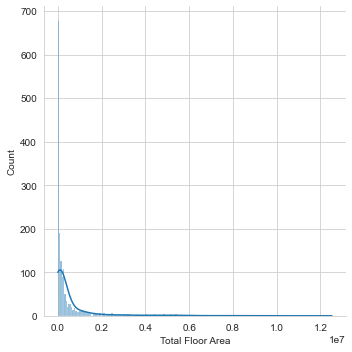

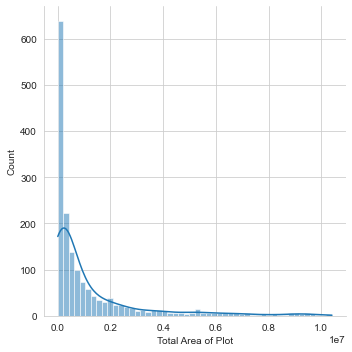

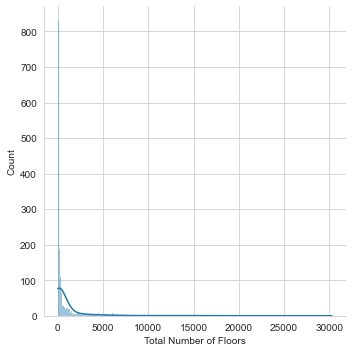

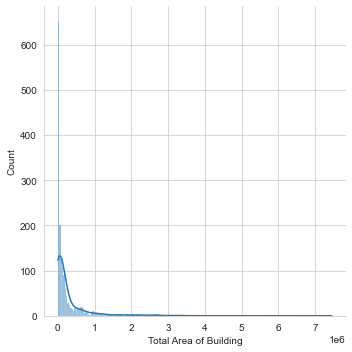

In [29]:
# Distribution Plots of Numerical Features
plt.figure(figsize=(20,90))
for i in num_feat:
    sns.displot(x=cleaned_df[i], kde=True)
    plt.show()


### V.  NAME

In [30]:
#drop rows that contain specific 'value' in 'column_name'
df1 = cleaned_df.drop(cleaned_df[cleaned_df['Region'] == "Grand Total"].index)
df1 = cleaned_df.drop(cleaned_df[cleaned_df['Building Type'] == "Total"].index)

In [31]:
#grouping he data by sum of Number of Permits in each Region
data = df1.groupby("Region")['Number of Permits'].sum()
data

Region
Al-Baaha             22717.0
Al-Jowf              38512.0
Al-Qasim             97689.0
Aseer               107742.0
Eastern             174662.0
Hael                 52434.0
Jazan                36346.0
Madinah             122725.0
Makkah              115402.0
Najran               32619.0
Northern Borders     38548.0
Riyadh              100975.0
Tabuk                66289.0
Name: Number of Permits, dtype: float64

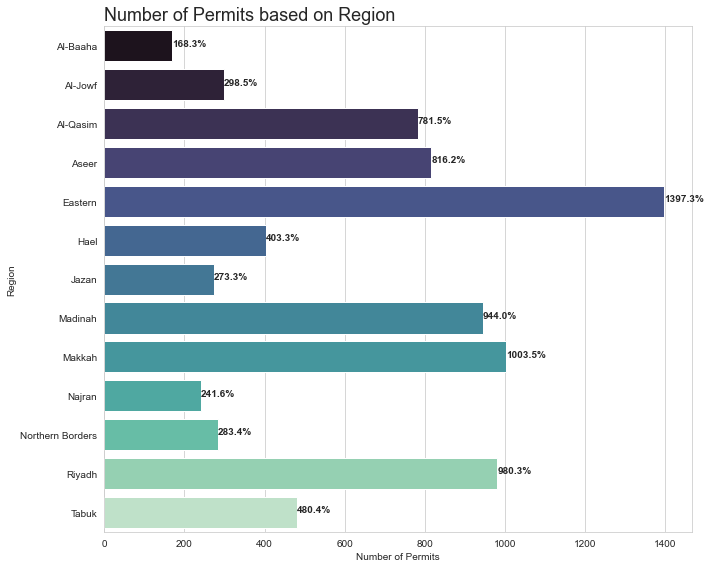

In [32]:
#plot the Number of Permits in each Region
bar,ax = plt.subplots(figsize=(10,8))
sns.set_style("ticks")

ax = sns.barplot(y="Region", x="Number of Permits", data=df1, ci=None, palette="mako"
                 ,orient='h')
ax.set_title("Number of Permits based on Region", fontsize=18, loc='left')
ax.set_ylabel ("Region")
ax.set_xlabel ("Number of Permits")

for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
bar.savefig("Seaborn_Bar_Vertical.png");

plt.tight_layout() 
plt.show()

### VI. NAME

In [33]:
#groupby the data by delivery type
data = df1.groupby("Building Type")['Number of Permits'].mean()
data

Building Type
Commercial                                    264.138889
Educational Buildings, Health and Mosques      85.687793
Industrial                                     51.871795
Industrial, Commercial                        230.532808
Residential                                  3831.156250
Residential, Commercial                      2131.730435
Social Buildings and Governmental              31.321867
Name: Number of Permits, dtype: float64

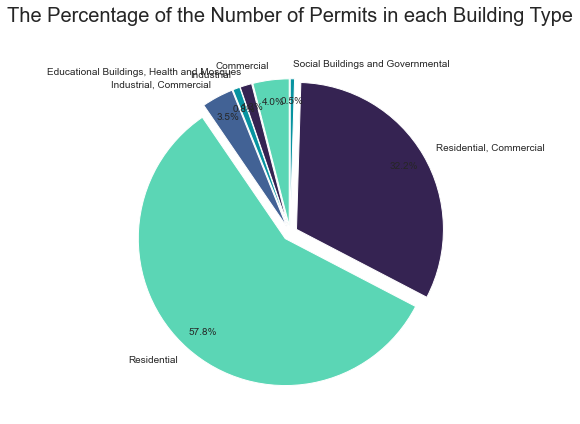

In [34]:
#Using matplotlib
fig1, ax1 = plt.subplots(figsize=[10,6])
labels = data.keys()
explode = (0.05,0.05,0.05,0.05,.05,.05,.05)
colors = ['#5BD6B5','#352352','#0793A0','#426295']
plt.pie(x=data, autopct="%1.1f%%", explode=explode, labels=labels,colors = colors, startangle=90, pctdistance=0.85)
plt.title("The Percentage of the Number of Permits in each Building Type\n", fontsize=20);
# pie.savefig("DeliveryPieChart.png")


# Equal aspect ratio ensures that pie is drawn as a circle
#ax.axis('equal')  
plt.tight_layout()
plt.show()

### VII. NAME

In [35]:
import plotly.express as px

data_1 = df1.groupby("Region")['Number of Permits'].sum()
data_1

Region
Al-Baaha             22717.0
Al-Jowf              38512.0
Al-Qasim             97689.0
Aseer               107742.0
Eastern             174662.0
Hael                 52434.0
Jazan                36346.0
Madinah             122725.0
Makkah              115402.0
Najran               32619.0
Northern Borders     38548.0
Riyadh              100975.0
Tabuk                66289.0
Name: Number of Permits, dtype: float64

In [36]:
px.histogram(df,x="Number of Permits",y="Region", color="Building Type")

### VIII. NAME 4th plot

In [37]:
#groupby the data by delivery type
data_1 = df1.groupby("Year")['Number of Permits'].sum()
data_1

Year
1987    15678.0
1988    31187.0
1989    30226.0
1990    23669.0
1991    31355.0
1992    32758.0
1993    53295.0
1994    37547.0
1995    29873.0
1996    29044.0
1997    21468.0
1998    24435.0
1999    32753.0
2000    32756.0
2001    34195.0
2002    34033.0
2003    30803.0
2004    33003.0
2005    21732.0
2006    41166.0
2007    26719.0
2008    19549.0
2009    17821.0
2010    24767.0
2011    20693.0
2012    17955.0
2013    20325.0
2014    27105.0
2015    33363.0
2016    19188.0
2017    44250.0
2018    51693.0
2019    62256.0
Name: Number of Permits, dtype: float64

Text(0.5, 1.0, "The mean of price's in Each Administrative Area Based on square meter range (300-700)\n")

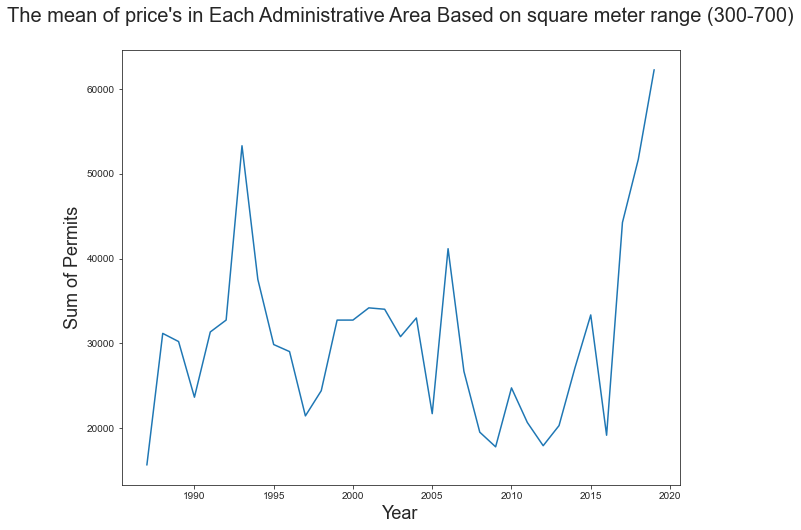

In [38]:
# Plot Price per Each Administritive Area
plt.figure(figsize=(10,8))
plt.plot(data_1)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Sum of Permits", fontsize=18)
plt.title("The mean of price's in Each Administrative Area Based on square meter range (300-700)\n", fontsize=20)

### IX. PLOT NAME  plot

In [39]:
px.line(df1, x="Year", y="Number of Permits", color="Region")

### X. PLOT NAME plot

In [40]:
px.line(df1, x="Year", y="Number of Permits", color="Building Type")

### XI. Heatmap to show Multicollinearity

In [41]:
# Weak Correlation --> below 0.5 
# Correlation --> 0.5 - 0.7
# Strong Correlation --> more than 0.7

relation= cleaned_df.corr()
relation_index=relation.index
relation

Year  Longitude  Latitude  \
Year                     1.000000  -0.008675 -0.021444   
Longitude               -0.008675   1.000000 -0.188787   
Latitude                -0.021444  -0.188787  1.000000   
Total Lenghts of Fences  0.056436   0.018170  0.156131   
Number of Permits        0.006937   0.020523  0.126713   
Total Floor Area         0.089204  -0.022500  0.099205   
Total Area of Plot       0.179552  -0.030692  0.167459   
Total Number of Floors   0.058806   0.003396  0.081749   
Total Area of Building   0.100953  -0.008294  0.153636   

                         Total Lenghts of Fences  Number of Permits  \
Year                                    0.056436           0.006937   
Longitude                               0.018170           0.020523   
Latitude                                0.156131           0.126713   
Total Lenghts of Fences                 1.000000           0.853354   
Number of Permits                       0.853354           1.000000   
Total Floor Area                        0.731287           0.851783   
Total Area of Plot                      0.655107           0.708455   
Total Number of Floors                  0.790253           0.937680   
Total Area of Building                  0.806889           0.871468   

                         Total Floor Area  Total Area of Plot  \
Year                             0.089204            0.179552   
Longitude                       -0.022500           -0.030692   
Latitude                         0.099205            0.167459   
Total Lenghts of Fences          0.731287            0.655107   
Number of Permits                0.851783            0.708455   
Total Floor Area                 1.000000            0.773243   
Total Area of Plot               0.773243            1.000000   
Total Number of Floors           0.873944            0.687370   
Total Area of Building           0.927179            0.792326   

                         Total Number of Floors  Total Area of Building  
Year                                   0.058806                0.100953  
Longitude                              0.003396               -0.008294  
Latitude                               0.081749                0.153636  
Total Lenghts of Fences                0.790253                0.806889  
Number of Permits                      0.937680                0.871468  
Total Floor Area                       0.873944                0.927179  
Total Area of Plot                     0.687370                0.792326  
Total Number of Floors                 1.000000                0.836947  
Total Area of Building                 0.836947                1.000000

<AxesSubplot:>

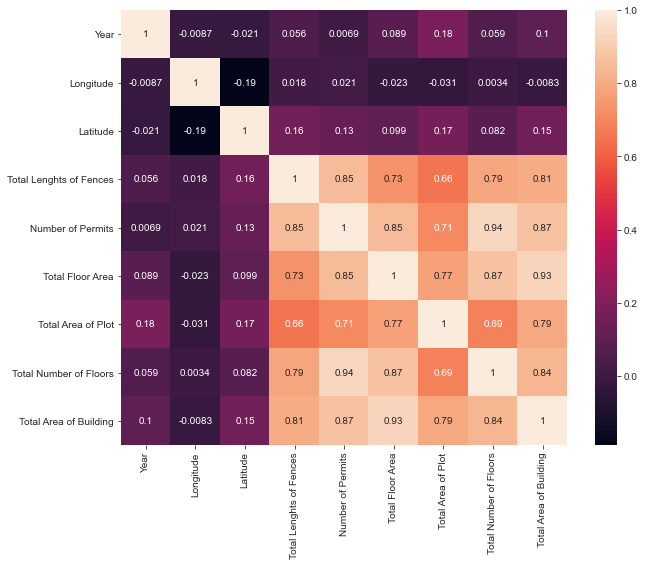

In [42]:
#heatmap that show the Correlation btw all features
plt.figure(figsize=(10,8))
sns.heatmap(cleaned_df[relation_index].corr(),annot=True)


## 5. FEATURE TRANSFORMATION
- Changing the distribution of numerical features to Gaussian (Normal)
- We will apply power transform (Yeo-Johnson) on the features.

In [43]:
from sklearn.model_selection import train_test_split
# Split Data
#train, test = train_test_split(
#    cleaned_df, 
#    train_size = .80,
#    test_size =.20,
#    random_state=42
#)

In [44]:
#from sklearn.preprocessing import PowerTransformer
#scaler = PowerTransformer(method='yeo-johnson')

In [45]:
#trans_df = train.copy()
#num_feat, _ = get_cat_num_features(train)

#def transformed_feat(trans_df, test_df, num_feat):
    
#    for col in num_feat:
#        t = scaler.fit_transform(np.array(train[col]).reshape(-1,1))
#        trans_df[col] = t.reshape(-1)
#        t = scaler.transform(np.array(test[col]).reshape(-1, 1))
#        test_df[col] = t.reshape(-1)
        
#    return trans_df, test_df

#trans_df, test_df = transformed_feat(trans_df, test, num_feat)

In [46]:
#print(trans_df.shape)
#print(test_df.shape)

## 6. ENCODING

- Using label encoding 

In [47]:
#show un numerical features
features.describe(exclude="number")

Region                              Building Type
count    1666                                       1666
unique     13                                          7
top     Tabuk  Educational Buildings, Health and Mosques
freq      138                                        426

In [48]:
from sklearn.preprocessing import LabelEncoder
# Assigning numerical values and storing in another column
labelencoder = LabelEncoder()



enc_df = cleaned_df
#test_enc_df = test_df.copy()
#enc_df = cleaned_df.copy()

#do the labelencoder for Region and Building Type features
enc_df['Region'] = labelencoder.fit_transform(enc_df['Region'])
enc_df['Building Type'] = labelencoder.fit_transform(enc_df['Building Type'])

#test_enc_df['Region'] = labelencoder.fit_transform(test_enc_df['Region'])
#test_enc_df['Building Type'] = labelencoder.fit_transform(test_enc_df['Building Type'])

## 7. DETECTING MULTICOLLINEARITY WITH VIF
- Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = enc_df.drop(['Number of Permits'], axis=1)
y = enc_df['Number of Permits']



# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                   feature         VIF
0                     Year  249.521637
1                   Region    3.744517
2            Building Type    4.373622
3                Longitude   29.010195
4                 Latitude  187.906193
5  Total Lenghts of Fences    4.274626
6         Total Floor Area   12.620181
7       Total Area of Plot    3.877314
8   Total Number of Floors    6.309130
9   Total Area of Building   12.938023


In [50]:
#drop 'Total Area of Building', 'Latitude', 'Longitude' features that have high VIF
cols = ['Total Area of Building', 'Latitude', 'Longitude']
enc_df.drop(cols, axis=1, inplace=True)
#test_enc_df.drop(cols, axis=1, inplace=True)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = enc_df.drop(['Number of Permits'], axis=1) # features
y = enc_df['Number of Permits'] # target

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                   feature       VIF
0                     Year  6.947731
1                   Region  3.554342
2            Building Type  4.364272
3  Total Lenghts of Fences  3.337940
4         Total Floor Area  6.714359
5       Total Area of Plot  3.615020
6   Total Number of Floors  6.229147


## 8. MODEL TRAINING & EVALUATION

In [52]:
# import that needs for modeling 
import time
from pprint import pprint 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, ElasticNet, OrthogonalMatchingPursuit, Lars, TheilSenRegressor, ARDRegression, PassiveAggressiveRegressor, Lasso, BayesianRidge, RANSACRegressor, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression

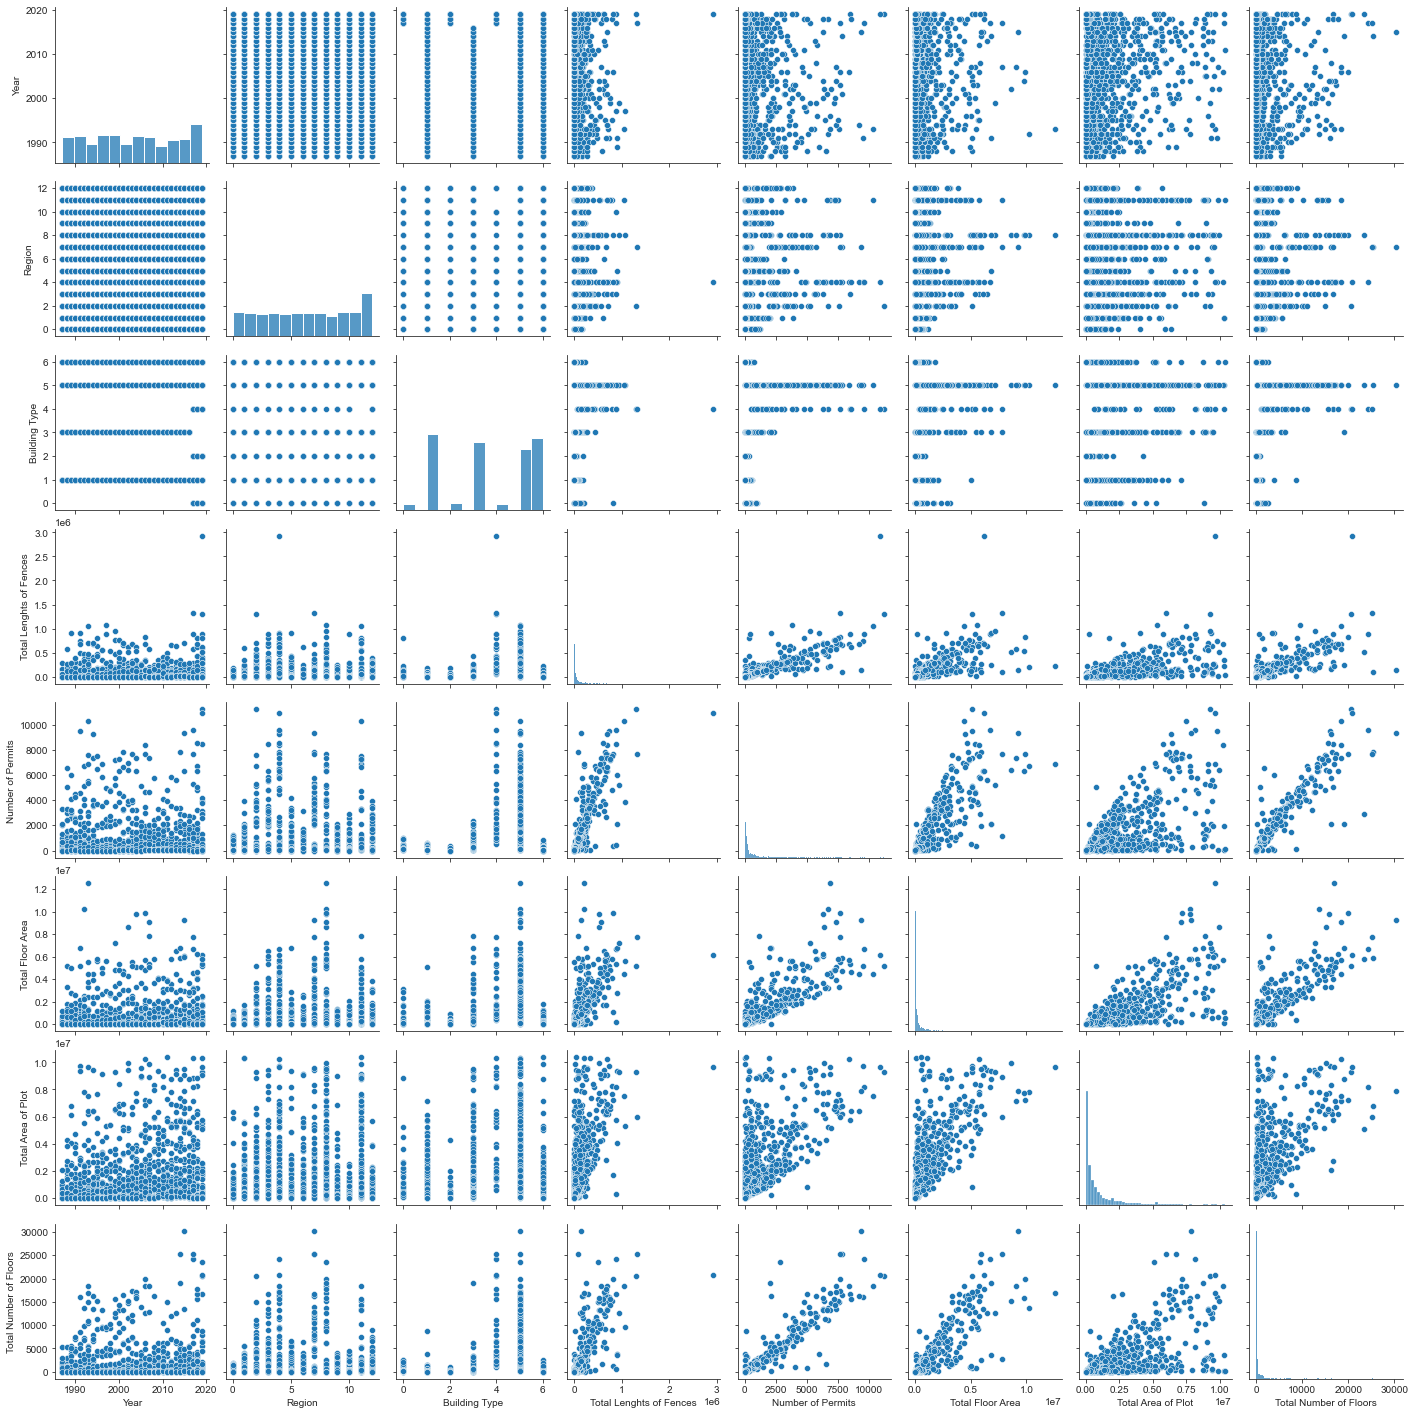

In [53]:
#show pairplot for all data
sns.pairplot(enc_df)

### I. Data Split

In [54]:
#creat split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split train/test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) #split train/test

### II. Apply Models

In [55]:
# creaat all regressors modele 
regressors = {
    #"XGBRegressor": XGBRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "GaussianProcessRegressor": GaussianProcessRegressor(random_state=42),
    #"GradientBoosting": GradientBoostingRegressor(random_state=42),
    "KNeighbors": KNeighborsRegressor(), 
    "Bagging": BaggingRegressor(random_state=42),
    "ExtraTree": ExtraTreesRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(random_state=42),
    "LinearRegression": LinearRegression(),
    "HuberRegressor": HuberRegressor(),
    "RANSAC": RANSACRegressor(random_state=42),
    #"ARDRegression": ARDRegression(),
    #"KernelRidge": KernelRidge(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42),
    #"BayesianRidge" : BayesianRidge(),
    #"ElasticNet" : ElasticNet(),
    #"SGD" : SGDRegressor(),
    #"AdaBoost" : AdaBoostRegressor(),
    #"Lars": Lars(),
    #"TheilSenRegressor": TheilSenRegressor(),
    #"PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    #"OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
    
}

### III. baseline model 

In [56]:
# create a baseline model 
# y_pred_base = 

### IV. Scale the Data

In [57]:
#creat Scale the Data for all train ,val and test
y_train_sc = y_train.to_numpy()
y_val_sc = y_val.to_numpy()
y_test_sc = y_test.to_numpy()

In [58]:
#reshape the Data for all train ,val and test
y_train_sc = y_train_sc.reshape(-1,1)
y_val_sc = y_val_sc.reshape(-1,1)
y_test_sc = y_test_sc.reshape(-1,1)

In [59]:
# use StandardScaler 
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)

y_scaler = StandardScaler()
y_train_sc = y_scaler.fit_transform(y_train_sc)
y_val_sc = y_scaler.transform(y_val_sc)
    

In [60]:
#list the name of columns that needs to print the final result 
df_models = pd.DataFrame(columns=['model', 'run_time', 'MSE', 'MAE', 'RMSE', 'Score'])

for key in regressors:

    
    # calculate training time 
    start_time = time.time()  
    
    # fit the model 
    regressor = regressors[key]
    model = regressor.fit(X_train_sc, y_train_sc)
    
    # evaluate the model 
    y_pred = model.predict(X_val_sc)
    
    y_pred_inverse = y_scaler.inverse_transform(y_pred)

    # Metrics of Evaluation
    mse = round(mean_squared_error(y_val_sc, y_pred_inverse),5) 
    mae = round(mean_absolute_error(y_val_sc, y_pred_inverse),5)
    rmse = round(np.sqrt(mean_squared_error(y_val_sc, y_pred_inverse)),5)
    
    score = round(model.score(X_val_sc, y_pred_inverse),2)
    
    run_time = format(round((time.time() - start_time)/60,2))

    # assign the data in each rows
    row = {'model': key,
           'run_time': run_time,
           'MSE' : mse,
           'MAE' : mae,
           'RMSE': rmse,
           'Score': score
    }

    df_models = df_models.append(row, ignore_index=True)

<ipython-input-60-1bda28cd91d4>:11: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

<ipython-input-60-1bda28cd91d4>:11: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was 

In [61]:
#print the result
df_models.head(50).sort_values(by='MAE', ascending=True)

model run_time           MSE        MAE        RMSE  \
14                     Lasso      0.0  3.292666e+05  573.81638   573.81756   
2   GaussianProcessRegressor      0.0  1.697924e+06  624.43190  1303.04422   
8                      NuSVR      0.0  2.331990e+06  663.16835  1527.08530   
7                        SVR      0.0  2.409637e+06  682.05188  1552.30066   
13                     Ridge      0.0  2.423625e+06  692.89263  1556.79961   
10          LinearRegression      0.0  2.425492e+06  692.93396  1557.39898   
9                  LinearSVR      0.0  2.821568e+06  695.53324  1679.75224   
11            HuberRegressor      0.0  2.794004e+06  695.97372  1671.52737   
1      DecisionTreeRegressor      0.0  2.864023e+06  712.88303  1692.34241   
3                 KNeighbors      0.0  2.983212e+06  718.43285  1727.19778   
5                  ExtraTree      0.0  2.887755e+06  727.61453  1699.33950   
0      RandomForestRegressor     0.01  2.935894e+06  728.92831  1713.44516   
4                    Bagging      0.0  2.986128e+06  736.52985  1728.04180   
12                    RANSAC      0.0  4.420027e+06  835.08024  2102.38604   
6                   AdaBoost      0.0  3.025150e+06  957.57566  1739.29574   

    Score  
14   0.00  
2   -0.26  
8   -0.23  
7   -0.23  
13  -0.23  
10  -0.23  
9   -0.21  
11  -0.21  
1   -0.21  
3   -0.21  
5   -0.22  
0   -0.22  
4   -0.22  
12  -0.19  
6   -0.43

- The Results after scaling are worst than the defult 

### IV. Fitting the defult models 

In [62]:
#list the name of columns that needs to print the final result 
df_models = pd.DataFrame(columns=['model', 'run_time', 'MSE', 'MAE', 'RMSE', 'Score'])

for key in regressors:

    
    # calculate training time 
    start_time = time.time()  
    
    # fit the model 
    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    
    # evaluate the model 
    y_pred = model.predict(X_val)

    # Metrics of Evaluation
    mse = round(mean_squared_error(y_val, y_pred),5) 
    mae = round(mean_absolute_error(y_val, y_pred),5)
    rmse = round(np.sqrt(mean_squared_error(y_val, y_pred)),5)
    
    score = model.score(X_val, y_pred)
    
    run_time = format(round((time.time() - start_time)/60,2))

    # assign the data in each rows
    row = {'model': key,
           'run_time': run_time,
           'MSE' : mse,
           'MAE' : mae,
           'RMSE': rmse,
           'Score': score
    }

    df_models = df_models.append(row, ignore_index=True)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [63]:
#print the result
df_models.head(50).sort_values(by='MAE', ascending=True)

model run_time           MSE        MAE        RMSE  \
5                  ExtraTree      0.0  8.487632e+04   82.33959   291.33540   
0      RandomForestRegressor     0.01  1.499975e+05   96.95865   387.29509   
11            HuberRegressor      0.0  1.825589e+05  118.21323   427.26912   
4                    Bagging      0.0  1.772617e+05  118.41049   421.02459   
1      DecisionTreeRegressor      0.0  1.912585e+05  137.19850   437.33115   
14                     Lasso      0.0  1.641140e+05  168.08248   405.10983   
13                     Ridge      0.0  1.641008e+05  168.21528   405.09357   
10          LinearRegression      0.0  1.641008e+05  168.21718   405.09355   
12                    RANSAC      0.0  4.288625e+05  196.64019   654.87596   
3                 KNeighbors      0.0  3.803388e+05  274.20375   616.71612   
6                   AdaBoost      0.0  1.875317e+05  357.73883   433.04929   
9                  LinearSVR      0.0  8.786739e+05  383.25969   937.37606   
7                        SVR      0.0  2.763020e+06  664.60945  1662.23349   
8                      NuSVR      0.0  2.677040e+06  688.46174  1636.16615   
2   GaussianProcessRegressor      0.0  3.058088e+06  738.35581  1748.73904   

    Score  
5     1.0  
0     1.0  
11    1.0  
4     1.0  
1     1.0  
14    1.0  
13    1.0  
10    1.0  
12    1.0  
3     1.0  
6     1.0  
9     1.0  
7     1.0  
8     1.0  
2     1.0

### Which Model

- Which model wins ? and why ? 
- The defult Results are better than the scaled results 
- We are going to compare the Extra tree from models from the defult, since its the best one
- And we are going to see the RandomForest as well 

### IV. Assess the top performing model

In [64]:
# define the extra tree model
et_model = ExtraTreesRegressor(random_state = 42)
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_val)


# define the random forest model
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

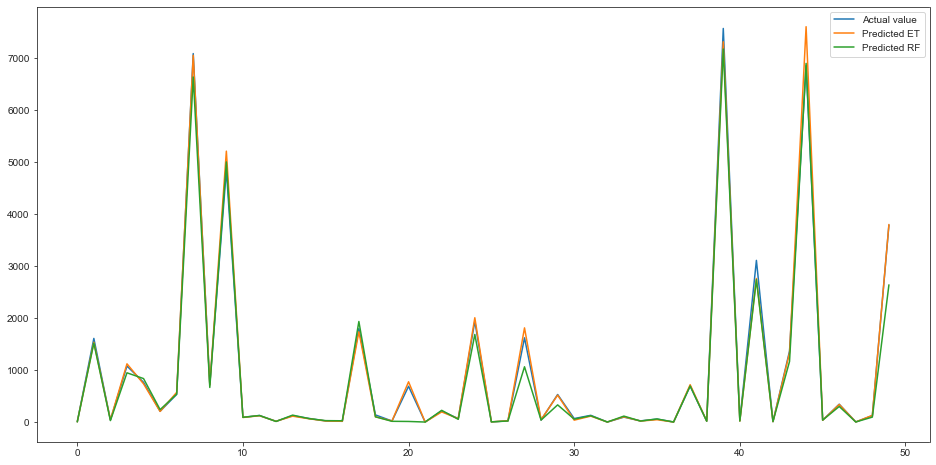

In [65]:
#plot for baseline results for ExtraTree, RandomForest, XGB and the Actual Value of the val set¶ 
test = pd.DataFrame({'Predicted ET':y_pred_et, 'Predicted RF':y_pred_rf, 'Actual value':y_val})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted ET', 'Predicted RF'])

#### The Plot Above shows the baseline results for ExtraTree, RandomForest, XGB and the Actual Value of the val set

### V. HYPERPARAMETER TUNING


In [85]:
## Number of trees in random forest
n_estimators = [int(x) for x in range(2,10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(5,10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# The function to measure the quality of a split.
criterion= ['mse','mae']
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'bootstrap': bootstrap}

#### 1. Extra Tree

In [86]:
# Use the grid grid to search for best hyperparameters
# First create the base model to tune
et = ExtraTreesRegressor()

# grid search of parameters, using 3 fold cross validation, 
et_grid = GridSearchCV(estimator = et, param_grid = param_grid, scoring = 'neg_mean_absolute_error',
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search model
et_grid.fit(X_train, y_train)

Fitting 3 folds for each of 4608 candidates, totalling 13824 fits


GridSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [5, 6, 7, 8, 9, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_absolute_error', verbose=2)

In [87]:
et_grid_df = pd.DataFrame(et_grid.cv_results_)
et_grid_df.sort_values(by='rank_test_score', ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
775        0.045490      0.005128         0.009050        0.002539   
4421       0.294845      0.007198         0.004851        0.000489   
4279       0.299809      0.010994         0.004644        0.000226   
4468       0.215026      0.037336         0.004725        0.000190   
4062       0.292668      0.034536         0.004877        0.000691   
...             ...           ...              ...             ...   
1336       0.016174      0.000282         0.004480        0.000453   
360        0.012522      0.004480         0.004762        0.001600   
2472       0.008950      0.001778         0.004123        0.000707   
176        0.008115      0.000169         0.004543        0.001765   
184        0.008033      0.000917         0.006543        0.003792   

     param_bootstrap param_criterion param_max_depth param_max_features  \
775             True             mse               9               auto   
4421           False             mae            None               auto   
4279           False             mae               9               auto   
4468           False             mae            None               auto   
4062           False             mae               8               auto   
...              ...             ...             ...                ...   
1336            True             mae               5               sqrt   
360             True             mse               6               sqrt   
2472           False             mse               5               sqrt   
176             True             mse               5               sqrt   
184             True             mse               5               sqrt   

     param_min_samples_leaf param_min_samples_split param_n_estimators  \
775                       1                       2                  9   
4421                      1                       2                  7   
4279                      3                       2                  9   
4468                      3                       2                  6   
4062                      2                       2                  8   
...                     ...                     ...                ...   
1336                      4                      10                  2   
360                       4                       2                  2   
2472                      4                       2                  2   
176                       4                       5                  2   
184                       4                      10                  2   

                                                 params  split0_test_score  \
775   {'bootstrap': True, 'criterion': 'mse', 'max_d...         -95.661780   
4421  {'bootstrap': False, 'criterion': 'mae', 'max_...        -101.912676   
4279  {'bootstrap': False, 'criterion': 'mae', 'max_...         -96.288106   
4468  {'bootstrap': False, 'criterion': 'mae', 'max_...         -95.093427   
4062  {'bootstrap': False, 'criterion': 'mae', 'max_...         -92.661972   
...                                                 ...                ...   
1336  {'bootstrap': True, 'criterion': 'mae', 'max_d...        -323.089437   
360   {'bootstrap': True, 'criterion': 'mse', 'max_d...        -457.377287   
2472  {'bootstrap': False, 'criterion': 'mse', 'max_...        -323.753933   
176   {'bootstrap': True, 'criterion': 'mse', 'max_d...        -299.698703   
184   {'bootstrap': True, 'criterion': 'mse', 'max_d...        -508.770202   

      split1_test_score  split2_test_score  mean_test_score  std_test_score  \
775          -89.020311        -103.424585       -96.035559        5.886457   
4421         -76.724346        -115.128370       -97.921797       15.930319   
4279         -95.969640        -102.567293       -98.275013        3.037883   
4468        -103.954225         -97.530516       -98.859390        3.737456   
4062         -99.156162        -105.222535 

In [114]:
et_grid_df.iloc[4279]['params']

{'bootstrap': False,
 'criterion': 'mae',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 9}

In [115]:
et_opt = ExtraTreesRegressor(n_estimators=9,
                         max_depth=9,
                         bootstrap=False,
                         criterion = 'mae',
                         max_features = 'auto',
                         min_samples_leaf = 3,
                         min_samples_split = 2,
                         random_state=42)

#### 2. Random forest

In [88]:
# Use the grid grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# grid search of parameters, using 3 fold cross validation, 
rf_grid = GridSearchCV(estimator = et, param_grid = param_grid, scoring = 'neg_mean_absolute_error',
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search model
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 4608 candidates, totalling 13824 fits


GridSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [5, 6, 7, 8, 9, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_absolute_error', verbose=2)

In [89]:
rf_grid_df = pd.DataFrame(rf_grid.cv_results_)
rf_grid_df.sort_values(by='rank_test_score', ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4470       0.287774      0.014469         0.005006        0.000197   
4469       0.245227      0.001310         0.004505        0.000183   
4446       0.295577      0.008186         0.004497        0.000193   
4455       0.357939      0.009790         0.004996        0.000317   
4420       0.283292      0.021073         0.004712        0.000236   
...             ...           ...              ...             ...   
1328       0.017766      0.002343         0.004029        0.000518   
1320       0.014144      0.003280         0.003565        0.000105   
169        0.011057      0.000339         0.004155        0.000237   
168        0.011288      0.003799         0.003838        0.000101   
120        0.009560      0.001366         0.003983        0.000516   

     param_bootstrap param_criterion param_max_depth param_max_features  \
4470           False             mae            None               auto   
4469           False             mae            None               auto   
4446           False             mae            None               auto   
4455           False             mae            None               auto   
4420           False             mae            None               auto   
...              ...             ...             ...                ...   
1328            True             mae               5               sqrt   
1320            True             mae               5               sqrt   
169             True             mse               5               sqrt   
168             True             mse               5               sqrt   
120             True             mse               5               sqrt   

     param_min_samples_leaf param_min_samples_split param_n_estimators  \
4470                      3                       2                  8   
4469                      3                       2                  7   
4446                      2                       2                  8   
4455                      2                       5                  9   
4420                      1                       2                  6   
...                     ...                     ...                ...   
1328                      4                       5                  2   
1320                      4                       2                  2   
169                       4                       2                  3   
168                       4                       2                  2   
120                       2                       2                  2   

                                                 params  split0_test_score  \
4470  {'bootstrap': False, 'criterion': 'mae', 'max_...        -103.963556   
4469  {'bootstrap': False, 'criterion': 'mae', 'max_...         -93.171630   
4446  {'bootstrap': False, 'criterion': 'mae', 'max_...         -91.745423   
4455  {'bootstrap': False, 'criterion': 'mae', 'max_...         -96.903130   
4420  {'bootstrap': False, 'criterion': 'mae', 'max_...        -103.654930   
...                                                 ...                ...   
1328  {'bootstrap': True, 'criterion': 'mae', 'max_d...        -341.959155   
1320  {'bootstrap': True, 'criterion': 'mae', 'max_d...        -240.448592   
169   {'bootstrap': True, 'criterion': 'mse', 'max_d...        -371.704874   
168   {'bootstrap': True, 'criterion': 'mse', 'max_d...        -278.384218   
120   {'bootstrap': True, 'criterion': 'mse', 'max_d...        -424.579840   

      split1_test_score  split2_test_score  mean_test_score  std_test_score  \
4470         -90.930458         -92.411092       -95.768369        5.826314   
4469         -91.052515        -104.288531       -96.170892        5.804866   
4446        -101.517958         -95.309683       -96.191021        4.038001   
4455         -91.934116        -101.878560       -96.905269        4.059803   
4420         -82.185446        -106.899531 

In [116]:
rf_grid_df.iloc[4446]['params']

{'bootstrap': False,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 8}

In [117]:
rf_opt = RandomForestRegressor(n_estimators=8,
                           max_depth=None,
                           max_features='auto',
                           bootstrap=False,
                           min_samples_leaf= 2,
                           min_samples_split= 2,
                           criterion = 'mae',
                           random_state=42)

#### 3. Evaluate the Grid search Results 

In [118]:
#function that return the Performance of model 
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [119]:
# evaluate the grid search (EXTRA TREE)
et_base_model = ExtraTreesRegressor(random_state = 11)
et_base_model.fit(X_train, y_train)
et_base_accuracy = evaluate(et_base_model, X_val, y_val)

et_opt.fit(X_train,y_train)
et_grid_accuracy = evaluate(et_opt, X_val, y_val)

print('Improvement of {:0.2f}%.'.format( 100 * (et_grid_accuracy - et_base_accuracy) / et_base_accuracy))

Model Performance
Average Error: 77.5061 degrees.
Accuracy = 61.86%.
Model Performance
Average Error: 106.1960 degrees.
Accuracy = -inf%.
Improvement of -inf%.


In [120]:
# evaluate the grid search (Random Forest)
rf_base_model = RandomForestRegressor(random_state = 11)
rf_base_model.fit(X_train, y_train)
rf_base_accuracy = evaluate(rf_base_model, X_val, y_val)

rf_opt.fit(X_train,y_train)
rf_grid_accuracy = evaluate(rf_opt, X_val, y_val)

print('Improvement of {:0.2f}%.'.format( 100 * (rf_grid_accuracy - rf_base_accuracy) / rf_base_accuracy))

Model Performance
Average Error: 91.7605 degrees.
Accuracy = 57.49%.
Model Performance
Average Error: 144.3996 degrees.
Accuracy = 52.42%.
Improvement of -8.82%.


### VI. Find Training Time 

In [121]:
# Measure how long it takes to train the model 

def measure_time(model_name, model):
    
    # measure training time 
    print(model_name)
    %timeit model.fit(X_train, y_train)    
    

In [122]:
# call measure_time()

# measure ET training time 
measure_time('Extra Tree', et_opt)

# measure RF training time 
measure_time('\nRandom Forest', rf_opt)

Extra Tree
325 ms ± 40.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Random Forest
506 ms ± 22.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### VII. Metrics of Evaluation

In [123]:
# Calculate mse, mae, and rms

def calc_cost(y_true, y_predict):

    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict) 
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)


    ls = [mse, mae, rmse] # Appropriate for classification
    ls2 = ["MSE", "MAE", "RMSE"] # Appropriate for classification

    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
        
    return result_dict

### VIII. Fitting the models

In [124]:

# test the model on the val set
y_pred_et = et_opt.predict(X_val)

# test the model on the val set
y_pred_rf = rf_opt.predict(X_val)


print(f'\nET')
print(f'Score: {et_opt.score(X_val, y_val)}')
cost = calc_cost(y_val,y_pred_et)

print(f'RF')
print(f'Score: {rf_opt.score(X_val, y_val)}')
cost = calc_cost(y_val,y_pred_rf)


ET
Score: 0.9411691561592413
MSE: 147837.14135108894
MAE: 106.1960049937578
RMSE: 384.4959575224282
RF
Score: 0.8987947271192446
MSE: 254320.64637464887
MAE: 144.3995786516854
RMSE: 504.3021379834205


- The Results of ET before the Tunning = 82.33959   (MAE)
- The Results of RF before the Tunning = 96.95865	(MAE)

	

_____________________
- Grid search for Parms in Rank 1: 

        
    ET
        Score: 0.9459655369645561
        MSE: 135784.22521396406
        MAE: 117.54174357710717
        RMSE: 368.4891113913192
    RF
        Score: 0.889205815455781
        MSE: 278416.8040437734
        MAE: 150.1067415730337
        RMSE: 527.6521619815211

____________________

- Grid search for Parms in Rank 2: 

    ET
        Score: 0.9630505816934266
        MSE: 92850.8928380341
        MAE: 84.9764579989299
        RMSE: 304.7144447479215
    RF
        Score: 0.8892949064224288
        MSE: 278192.925666896
        MAE: 149.90262172284645
        RMSE: 527.4399735201116
        
__________________________

- Grid search for Parms in Rank 3: 

    ET
        Score: 0.9411691561592413
        MSE: 147837.14135108894
        MAE: 106.1960049937578
        RMSE: 384.4959575224282
    RF
        Score: 0.8987947271192446
        MSE: 254320.64637464887
        MAE: 144.3995786516854
        RMSE: 504.3021379834205
	

________________________
* The metrix of the Random forest After the hyperparameter tunning has been increesed than the defult model 
* our best model is the ET defult so, we are going to go with it ! 

## 9. MAKE THE PREDICTION

In [125]:
# fit the model 
et_model = ExtraTreesRegressor(random_state = 42)
et_model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [126]:

# make the prediction
y_pred_et = et_model.predict(X_test)


print(f'Extra tree with hyperparameter tuning \nScore: {et_model.score(X_test, y_test)}')
cost = calc_cost(y_test,y_pred_et)

Extra tree with hyperparameter tuning 
Score: 0.9366391106435558
MSE: 128352.63771197603
MAE: 101.642874251497
RMSE: 358.2633636195251


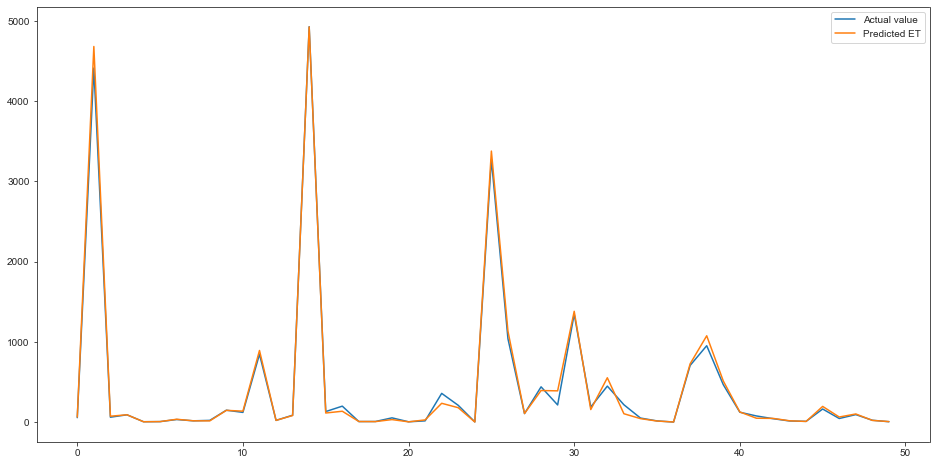

In [127]:
#plot of Extra tree Predicted and Actual value
test = pd.DataFrame({'Predicted ET':y_pred_et, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted ET'])

## 10. FIND ERROR %

In [128]:
# create a new df 
new_df = X_test
new_df['Number of Permits'] = y_test
# add predict column 
new_df['Preds'] = y_pred_et
new_df

<ipython-input-128-995a7310b6a1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-128-995a7310b6a1>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Year  Region  Building Type  Total Lenghts of Fences  Total Floor Area  \
1408  1995       7              1                   6087.0          88870.00   
1465  2006       7              5                 134813.0        4855077.00   
534   1991       3              3                   3884.0          36434.00   
1122  2006       5              3                  14168.0          65045.00   
2326  2007      12              6                   1358.0          21134.00   
...    ...     ...            ...                      ...               ...   
851   2019       4              4                2930948.0        6159405.98   
2045  2019      10              0                  11489.0          45457.69   
1114  2004       5              6                      0.0           8400.00   
208   1994       1              5                  84113.0         481374.00   
555   1995       3              5                 157923.0        1134339.00   

      Total Area of Plot  Total Number of Floors  Number of Permits    Preds  
1408          131229.000                    80.0               64.0    55.93  
1465         5473477.000                 12550.0             4680.0  4411.60  
534           227313.000                    75.0               74.0    61.66  
1122          234965.000                   101.0               92.0    91.67  
2326           27362.000                    10.0                5.0     5.41  
...                  ...                     ...                ...      ...  
851          9623012.943                 20706.0            10901.0  9516.27  
2045          132382.880                   119.0              111.0   114.62  
1114           18371.000                     9.0                8.0     6.58  
208          1298355.000                  1883.0             1011.0  1057.34  
555          2260636.000                  3520.0             1854.0  1998.70  

[334 rows x 9 columns]

In [129]:
# calculat Error Precentage
error_l = []
error_v = 0
for i in range(len(new_df)):
    actual = new_df.iloc[i]['Number of Permits']
    preds = new_df.iloc[i]['Preds']
    if actual != 0:
        error_v = round(abs((actual - preds)/actual)*100,2)
        error_l.append(error_v)
    else:
        error_v = -1
        error_l.append(error_v)
    
new_df['Error Precentage'] = error_l
new_df

<ipython-input-129-1fd803af6466>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Year  Region  Building Type  Total Lenghts of Fences  Total Floor Area  \
1408  1995       7              1                   6087.0          88870.00   
1465  2006       7              5                 134813.0        4855077.00   
534   1991       3              3                   3884.0          36434.00   
1122  2006       5              3                  14168.0          65045.00   
2326  2007      12              6                   1358.0          21134.00   
...    ...     ...            ...                      ...               ...   
851   2019       4              4                2930948.0        6159405.98   
2045  2019      10              0                  11489.0          45457.69   
1114  2004       5              6                      0.0           8400.00   
208   1994       1              5                  84113.0         481374.00   
555   1995       3              5                 157923.0        1134339.00   

      Total Area of Plot  Total Number of Floors  Number of Permits    Preds  \
1408          131229.000                    80.0               64.0    55.93   
1465         5473477.000                 12550.0             4680.0  4411.60   
534           227313.000                    75.0               74.0    61.66   
1122          234965.000                   101.0               92.0    91.67   
2326           27362.000                    10.0                5.0     5.41   
...                  ...                     ...                ...      ...   
851          9623012.943                 20706.0            10901.0  9516.27   
2045          132382.880                   119.0              111.0   114.62   
1114           18371.000                     9.0                8.0     6.58   
208          1298355.000                  1883.0             1011.0  1057.34   
555          2260636.000                  3520.0             1854.0  1998.70   

      Error Precentage  
1408             12.61  
1465              5.74  
534              16.68  
1122              0.36  
2326              8.20  
...                ...  
851              12.70  
2045              3.26  
1114             17.75  
208               4.58  
555               7.80  

[334 rows x 10 columns]

In [130]:
avg = new_df['Error Precentage'].mean()
maximum = new_df['Error Precentage'].max()
minimum = new_df['Error Precentage'].min()

In [131]:
print(avg, minimum, maximum)

20.52008982035928 -1.0 486.0


In [132]:
### set a conition to find the number of points that has errors greater than 30%
# this model was test on 408 records  "data points" --> 80 records is 20% of 408

# we hope thatn those points with error rate less than 20%



In [133]:
new_df['Error Precentage'].value_counts()

-1.00     9
 0.00     4
 25.00    2
 1.00     2
 22.56    2
         ..
 57.16    1
 30.83    1
 2.80     1
 2.17     1
 2.71     1
Name: Error Precentage, Length: 310, dtype: int64

In [134]:
new_df['Error Precentage'].describe()

count    334.000000
mean      20.520090
std       35.822987
min       -1.000000
25%        5.207500
50%       11.060000
75%       22.822500
max      486.000000
Name: Error Precentage, dtype: float64

In [135]:
dfa = new_df
len(dfa)

334

In [136]:
dfa = dfa[dfa['Error Precentage'] > 30]

In [137]:
len(dfa)

61